# 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr # 두 변수 간의 피어슨 상관계수를 계산하는 데 사용

plt.rcParams['font.family'] ='Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic' # 맥
plt.rcParams['axes.unicode_minus'] =False

# 지역별 범죄 발생 현황 분석

In [2]:
df = pd.read_csv('./범죄_data/범죄_발생지_20240116161110.csv', header = 1)

# 필요없는 col 제거

theft = df.iloc[11] # 절도 범죄df 생성

df = df.drop(['죄종별(1)', '계'], axis = 1).T  # 죄종별(1), 계  col 제거
df = df.rename(columns=df.iloc[0]).drop(df.index[0]) # col의 이름을 df의 첫 번재 행으로 변경 후 제거
df = df.drop(['소계', '죄종별(2)'], axis = 1) # 소계, 죄종별(2) col 제거

df

,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간·강제추행등,방화,상해,폭행,...,직권남용,증수뢰,통화,문서・인장,유가증권인지,사기,횡령,배임,성풍속범죄,도박범죄
서울,35,68,118,1200,219,4358,35,217,3353,26509,...,392,71,172,2033,25,52034,16368,791,4924,545
부산,29,24,43,347,83,1064,14,89,2478,8474,...,156,17,20,897,7,26847,4469,273,1602,384
대구,16,15,31,215,43,648,9,50,1568,5629,...,47,7,27,459,3,14836,2643,106,1125,138
인천,14,38,30,340,61,1030,16,70,1545,8040,...,78,21,29,581,-,16652,4175,184,1507,239
광주,1,2,10,152,32,391,8,35,641,3430,...,64,11,10,319,1,8249,1666,112,577,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
경상남도.7,-,1,5,19,4,38,2,5,134,334,...,5,-,-,28,-,1193,117,9,39,9
제주특별자치도,1,4,1,17,8,84,-,9,213,625,...,4,-,-,35,-,1599,225,12,82,13
제주특별자치도.1,3,4,4,78,13,201,3,20,351,2169,...,19,1,2,146,1,3996,646,52,216,49
기타도시,4,1,1,18,3,18,1,-,16,53,...,58,11,12,626,2,25191,993,176,786,110


In [3]:
# 절도 범죄와 위 데이터 합치기

theft_df = pd.DataFrame(theft)
theft_df = theft_df.iloc[3:] # 필요한 부분만 가져오기
theft_df = theft_df.rename(columns = {11 : '절도'}) # 컬럼의 이름 변경

# 값에 '-'을 0으로 변경 후 타입을 int로 변경
df = pd.concat([df, theft_df], axis = 1) # 범죄 데이터와 절도 범죄 데이터 합치기
df = df.replace('-', 0) # '-'을 0으로 변경
df = df.astype('int') # type 문자열이므로 수치형으로 변경

df

,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간·강제추행등,방화,상해,폭행,...,증수뢰,통화,문서・인장,유가증권인지,사기,횡령,배임,성풍속범죄,도박범죄,절도
서울,35,68,118,1200,219,4358,35,217,3353,26509,...,71,172,2033,25,52034,16368,791,4924,545,37594
부산,29,24,43,347,83,1064,14,89,2478,8474,...,17,20,897,7,26847,4469,273,1602,384,13699
대구,16,15,31,215,43,648,9,50,1568,5629,...,7,27,459,3,14836,2643,106,1125,138,9792
인천,14,38,30,340,61,1030,16,70,1545,8040,...,21,29,581,0,16652,4175,184,1507,239,8895
광주,1,2,10,152,32,391,8,35,641,3430,...,11,10,319,1,8249,1666,112,577,102,5204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
경상남도.7,0,1,5,19,4,38,2,5,134,334,...,0,0,28,0,1193,117,9,39,9,387
제주특별자치도,1,4,1,17,8,84,0,9,213,625,...,0,0,35,0,1599,225,12,82,13,886
제주특별자치도.1,3,4,4,78,13,201,3,20,351,2169,...,1,2,146,1,3996,646,52,216,49,2247
기타도시,4,1,1,18,3,18,1,0,16,53,...,11,12,626,2,25191,993,176,786,110,43


경기도, 강원도 등 나뉜 지역을 하나의 시로 묶기

-> 경기도, 경기도.1, 경기도.2, ..등으로 나뉘었기 때문이다

In [4]:
crime_df = df.loc['서울' : '세종']

crime_df

,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간·강제추행등,방화,상해,폭행,...,증수뢰,통화,문서・인장,유가증권인지,사기,횡령,배임,성풍속범죄,도박범죄,절도
서울,35,68,118,1200,219,4358,35,217,3353,26509,...,71,172,2033,25,52034,16368,791,4924,545,37594
부산,29,24,43,347,83,1064,14,89,2478,8474,...,17,20,897,7,26847,4469,273,1602,384,13699
대구,16,15,31,215,43,648,9,50,1568,5629,...,7,27,459,3,14836,2643,106,1125,138,9792
인천,14,38,30,340,61,1030,16,70,1545,8040,...,21,29,581,0,16652,4175,184,1507,239,8895
광주,1,2,10,152,32,391,8,35,641,3430,...,11,10,319,1,8249,1666,112,577,102,5204
대전,6,11,17,200,34,500,2,40,831,4166,...,13,7,336,0,11734,1456,105,733,181,6034
울산,8,7,10,112,14,311,10,28,683,2574,...,7,1,206,0,5615,759,72,449,248,3283
세종,2,3,2,26,6,73,1,8,119,400,...,1,3,70,0,1528,248,13,120,13,1110


In [5]:
df.index

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기도', '경기도.1', '경기도.2',
       '경기도.3', '경기도.4', '경기도.5', '경기도.6', '경기도.7', '경기도.8', '경기도.9', '경기도.10',
       '경기도.11', '경기도.12', '경기도.13', '경기도.14', '경기도.15', '경기도.16', '경기도.17',
       '경기도.18', '경기도.19', '경기도.20', '경기도.21', '경기도.22', '경기도.23', '경기도.24',
       '경기도.25', '경기도.26', '경기도.27', '강원도', '강원도.1', '강원도.2', '강원도.3', '강원도.4',
       '강원도.5', '강원도.6', '충청북도', '충청북도.1', '충청북도.2', '충청남도', '충청남도.1',
       '충청남도.2', '충청남도.3', '충청남도.4', '충청남도.5', '충청남도.6', '충청남도.7', '전라북도',
       '전라북도.1', '전라북도.2', '전라북도.3', '전라북도.4', '전라북도.5', '전라남도', '전라남도.1',
       '전라남도.2', '전라남도.3', '전라남도.4', '경상북도', '경상북도.1', '경상북도.2', '경상북도.3',
       '경상북도.4', '경상북도.5', '경상북도.6', '경상북도.7', '경상북도.8', '경상북도.9', '경상남도',
       '경상남도.1', '경상남도.2', '경상남도.3', '경상남도.4', '경상남도.5', '경상남도.6', '경상남도.7',
       '제주특별자치도', '제주특별자치도.1', '기타도시', '도시이외'],
      dtype='object')

In [6]:
si_lst = ['경기도', '강원도', '충청북도', '충청남도', '경상북도', '경상남도', '제주특별자치도'] # 변경 할 지역 이름을 담은 리스트

def si_change(df):
    si_crime_df = pd.DataFrame() # 새로운 데이터 프레임 생성
    for name in si_lst:
        df1 = df[df.index.str.contains(name)] # si_lst에 해당하는 지역 이름 데이터
        df1 = df1.sum() # 각 범죄별로 지역의 발생 건수 데이터
        df1 =  pd.DataFrame(df1, columns = [name]).T
        si_crime_df = pd.concat([si_crime_df, df1])
    return si_crime_df

si_crime_df = si_change(df)


# 전라남도, 전라북도는 이상해서 따로
Jeollanam = df[df.index.str.contains('전라남도')]
Jeollanam = Jeollanam.sum()
Jeollanam = pd.DataFrame(Jeollanam, columns = ['전라남도']).T

Jeollabuk = df[df.index.str.contains('전라북도')]
Jeollabuk = Jeollabuk.sum()
Jeollabuk = pd.DataFrame(Jeollabuk, columns = ['전라북도']).T

# 모든 데이터 합치기(지역별 범죄 현황)
crime_df = pd.concat([crime_df, si_crime_df, Jeollanam, Jeollabuk])
crime_df

,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간·강제추행등,방화,상해,폭행,...,증수뢰,통화,문서・인장,유가증권인지,사기,횡령,배임,성풍속범죄,도박범죄,절도
서울,35,68,118,1200,219,4358,35,217,3353,26509,...,71,172,2033,25,52034,16368,791,4924,545,37594
부산,29,24,43,347,83,1064,14,89,2478,8474,...,17,20,897,7,26847,4469,273,1602,384,13699
대구,16,15,31,215,43,648,9,50,1568,5629,...,7,27,459,3,14836,2643,106,1125,138,9792
인천,14,38,30,340,61,1030,16,70,1545,8040,...,21,29,581,0,16652,4175,184,1507,239,8895
광주,1,2,10,152,32,391,8,35,641,3430,...,11,10,319,1,8249,1666,112,577,102,5204
대전,6,11,17,200,34,500,2,40,831,4166,...,13,7,336,0,11734,1456,105,733,181,6034
울산,8,7,10,112,14,311,10,28,683,2574,...,7,1,206,0,5615,759,72,449,248,3283
세종,2,3,2,26,6,73,1,8,119,400,...,1,3,70,0,1528,248,13,120,13,1110
경기도,65,97,107,1148,189,3467,51,272,4914,33294,...,73,101,2311,13,69021,15190,764,5710,1380,40974
강원도,10,7,14,131,28,307,8,25,766,2559,...,3,13,240,3,6745,857,63,397,101,3512


In [7]:
# 5대 범죄 - 절도, 성폭력, 살인, 폭력, 강도만 가져오기

crime_df = crime_df.loc[:, crime_df.columns.isin(['절도', '강간', '살인기수', '폭행', '강도'])]


crime_df

,살인기수,강도,강간,폭행,절도
서울,35,118,1200,26509,37594
부산,29,43,347,8474,13699
대구,16,31,215,5629,9792
인천,14,30,340,8040,8895
광주,1,10,152,3430,5204
대전,6,17,200,4166,6034
울산,8,10,112,2574,3283
세종,2,2,26,400,1110
경기도,65,107,1148,33294,40974
강원도,10,14,131,2559,3512


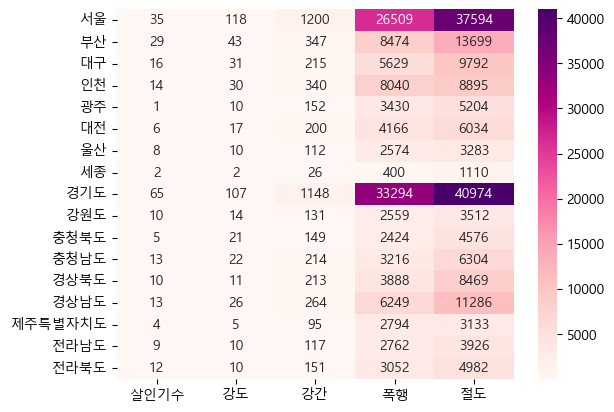

In [8]:
# 지역별 범죄 현황 히트맵 그리기

sns.heatmap(crime_df, cmap = 'RdPu', annot = True, fmt='d');

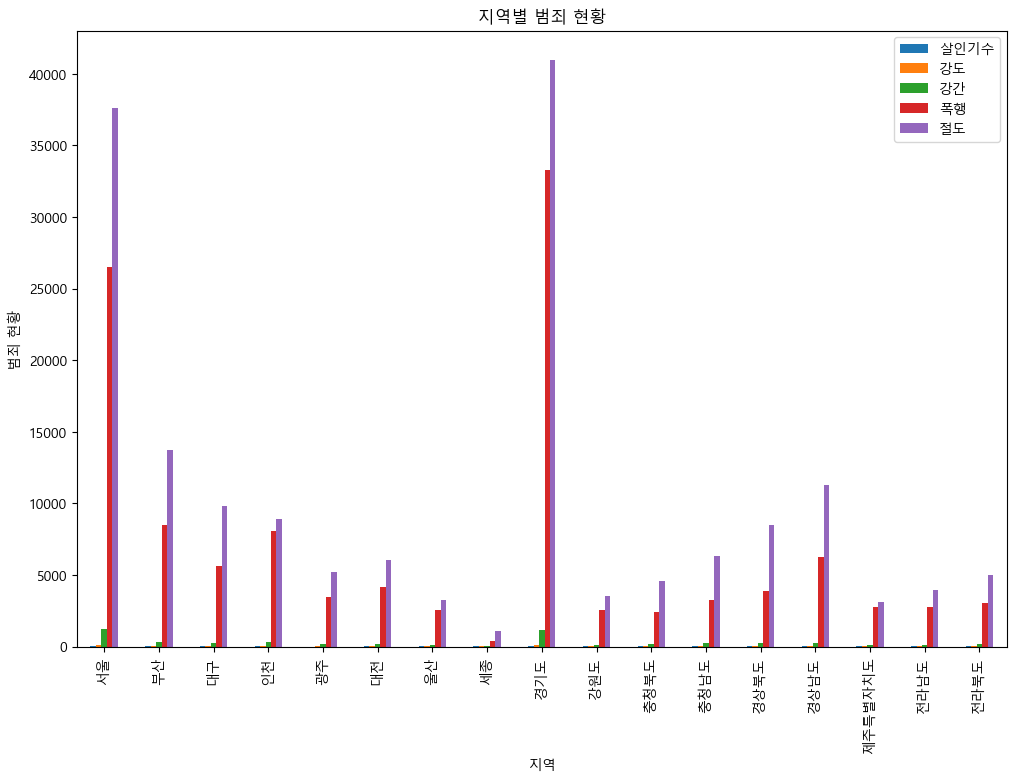

In [9]:
# 지역별 범죄 현황 그래프 그리기

crime_df.plot(kind = 'bar', figsize=(12, 8));

plt.title('지역별 범죄 현황');
plt.xlabel('지역');
plt.ylabel('범죄 현황');

<Axes: >

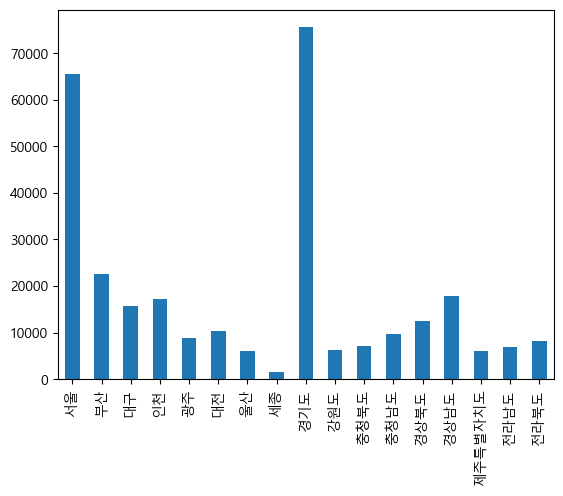

In [10]:
tot_df = crime_df.sum(axis = 1)

tot_df.plot(kind = 'bar')

=> 5대 범죄 중 절도가 가장 많고 폭행이 다음으로 많다

=> 5대 범죄가 가장 많이 일어나는 곳은 경기도이며 다음은 서울이다

# 서울시만 분석하기

## 서울시 5대 범죄 발생 현황 분석

In [11]:
seoul_crime_df = pd.read_csv('./범죄_data/5대+범죄+발생현황_20240116172339.csv')

seoul_crime_df = seoul_crime_df.rename(columns = seoul_crime_df.iloc[1]) # col의 이름을 df의 두번째 행으로 변경
seoul_crime_df = seoul_crime_df.drop('자치구별(1)', axis = 1) # 자치구별(1) col 제거
seoul_crime_df = seoul_crime_df.drop([0, 1, 2, 3]) # 필요없는 행 제거
seoul_crime_df.columns = ['자치구', '살인', '강도', '강간', '절도', '폭력'] # col의 이름을 변경
seoul_crime_df = seoul_crime_df.replace('-', 0) # '-'의 값을 0으로 변경
seoul_crime_df.set_index('자치구', inplace=True) # 인덱스명을 '자치구'로 변경 후 col은 제거
seoul_crime_df = seoul_crime_df.astype('int') # type 문자열이므로 수치형으로 변경

seoul_crime_df

,살인,강도,강간,절도,폭력
자치구,,,,,
종로구,2,8,228,1313,1587
중구,1,5,194,1365,1506
용산구,5,7,280,978,1697
성동구,2,2,125,979,1086
광진구,6,0,230,1670,1713
동대문구,4,2,125,1556,1566
중랑구,2,2,150,1508,1937
성북구,3,1,158,1143,1444
강북구,5,5,177,872,1773


In [12]:
seoul_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   살인      25 non-null     int32
 1   강도      25 non-null     int32
 2   강간      25 non-null     int32
 3   절도      25 non-null     int32
 4   폭력      25 non-null     int32
dtypes: int32(5)
memory usage: 700.0+ bytes


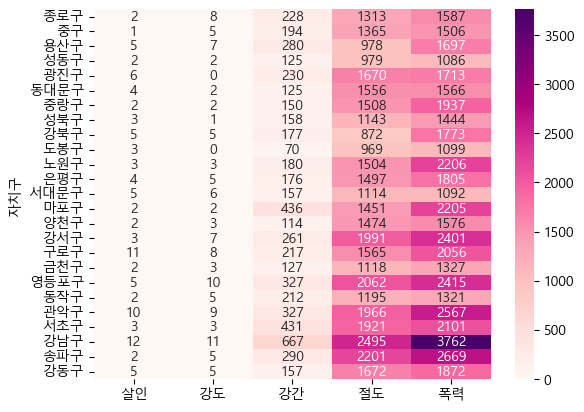

In [13]:
sns.heatmap(seoul_crime_df, cmap = 'RdPu', annot = True, fmt='d');

<Axes: xlabel='자치구'>

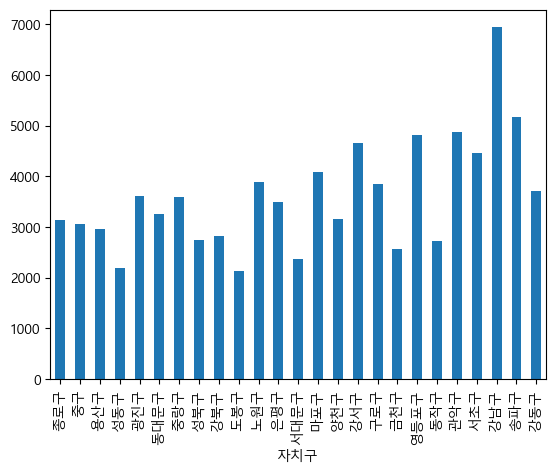

In [14]:
tot_df = seoul_crime_df.sum(axis = 1)

tot_df.plot(kind = 'bar')

=> 서울 중 강남구에서 5대 범죄가 월등하게 높다

=> 송파구, 관악구, 영등포구는 다음으로 많다

## 서울시 5대 범죄 발생 장소 분석

In [15]:
crime_place_df = pd.read_csv('./범죄_data/5대범죄+발생장소별+현황_20240116173638.csv')

crime_place_df = crime_place_df.rename(columns = crime_place_df.iloc[1]) # col의 이름을 df의 두번째 행으로 변경
crime_place_df = crime_place_df.drop(['범죄별(1)', '소계'], axis = 1) # 범죄별(1), 소계 col 제거
crime_place_df = crime_place_df.drop([0, 1, 2]) # 필요없는 행 제거
crime_place_df.columns = ['범죄', '아파트 연립다세대', '단독주택', '노상', '상점', '숙박업소 목욕탕', '유흥접객업소', '사무실',
       '역 대합실', '교통수단', '유원지', '학교', '금융기관', '기타'] # col의 이름 변경

crime_place_df

,범죄,아파트 연립다세대,단독주택,노상,상점,숙박업소 목욕탕,유흥접객업소,사무실,역 대합실,교통수단,유원지,학교,금융기관,기타
3,살인,30,26,17,2,-,5,5,2,1,1,-,-,15
4,강도,12,11,39,16,2,6,5,1,2,-,-,1,22
5,강간강제추행,551,578,950,191,277,679,152,178,829,68,47,4,1312
6,절도,2886,1579,11442,8991,337,1684,420,348,1007,487,189,578,7631
7,폭력,6302,5712,16872,1356,364,3565,1048,544,1058,406,192,65,9299


=> 5대 범죄 중 가장 많이 발생하는 절도와 폭력은 노상에서 가장 많이 발생한다

## 서울시 인구 데이터 분석

In [16]:
people_df = pd.read_csv('./범죄_data/주민등록인구(연령별_동별)_20240116174238.csv')

people_df = people_df.rename(columns = people_df.iloc[0]).drop([0]) # col의 이름을 df의 첫 번째 행으로 변경 후 삭제
people_df = people_df.drop('항목', axis = 1) # 항목 col 제거
people_df = people_df.astype({'합계' : 'int'}) #type이 문자열이므로 수치형으로 변경


people_gb = people_df.groupby('동별(1)')['합계'].sum().reset_index() # 각 동별로 인구 합계 구하기
people_gb.columns = ['자치구', '인구_합계']
people_gb.set_index('자치구', inplace = True)

people_gb

,인구_합계
자치구,
강남구,1092582
강동구,924906
강북구,589608
강서구,1139956
관악구,1001164
광진구,703918
구로구,833630
금천구,484152
노원구,1008846


<Axes: xlabel='자치구'>

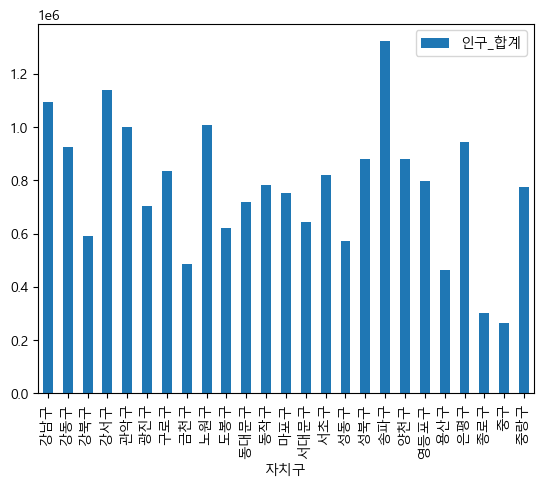

In [17]:
people_gb.plot(kind = 'bar')

=> 서울시 중 송파구, 강서구, 강남구 순으로 인구 수가 많다

### 서울시 인구와  범죄의 관계 파악

In [18]:
seoul_crime_df['범죄_합계'] = seoul_crime_df.sum(axis = 1)

seoul_crime_df.head(2)
people_gb.head(2)

,살인,강도,강간,절도,폭력,범죄_합계
자치구,,,,,,
종로구,2,8,228,1313,1587,3138
중구,1,5,194,1365,1506,3071


,인구_합계
자치구,
강남구,1092582
강동구,924906


In [19]:
# 서울시 5대 범죄 현황 데이터와 서울시 인구수 데이터 합치기

crime_people_df = pd.merge(seoul_crime_df, people_gb, on = '자치구')
crime_people_df = crime_people_df.sort_values('범죄_합계', ascending = False)

crime_people_df

,살인,강도,강간,절도,폭력,범죄_합계,인구_합계
자치구,,,,,,,
강남구,12,11,667,2495,3762,6947,1092582
송파구,2,5,290,2201,2669,5167,1323030
관악구,10,9,327,1966,2567,4879,1001164
영등포구,5,10,327,2062,2415,4819,796580
강서구,3,7,261,1991,2401,4663,1139956
서초구,3,3,431,1921,2101,4459,821532
마포구,2,2,436,1451,2205,4096,751278
노원구,3,3,180,1504,2206,3896,1008846
구로구,11,8,217,1565,2056,3857,833630


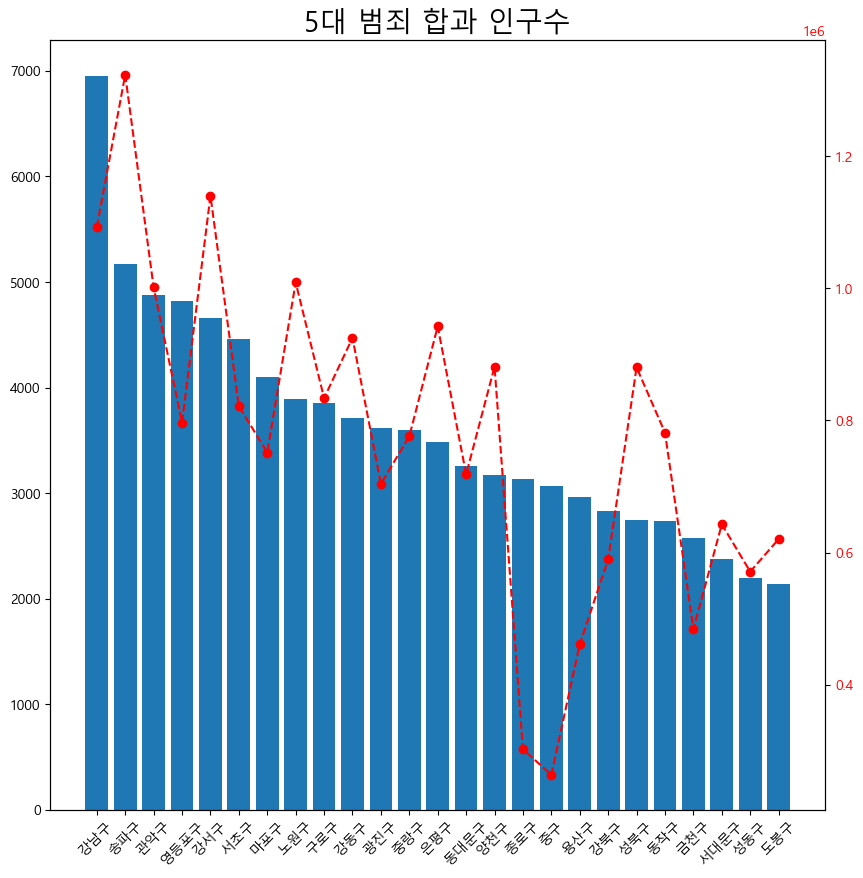

In [20]:
# 서울시 5대 범죄 현황과 서울시 인구수 그래프 그리기
# 두 개의 서로 다른 축을 가지는 복수의 데이터를 동시에 시각화

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot()

xtick_label_position = list(range(len(crime_people_df))); #x축의 눈금 위치를 담음
ax1.set_xticks(xtick_label_position); # x축의 눈금 위치 설정
ax1.set_xticklabels(crime_people_df.index); # x축의 눈금 레이블을 지역 자치구로 설정
ax1.bar(xtick_label_position, crime_people_df['범죄_합계']); # y축은 '범죄_합계'를 나타낸다
plt.xticks(rotation=45);
ax1.set_ylabel('범죄_합계');


ax2 = ax1.twinx() # ax1과 동일한 x축을 사용하면서 y축은 서로 다른 데이터를 표시하기 위해 새로운 y축 만들기
ax2.plot(xtick_label_position, crime_people_df['인구_합계'], color='r', linestyle='--', marker = 'o'); # x축은 자치구, y축은 '인구_합계'를 나타낸다
ax2.tick_params(axis = 'y', labelcolor = 'r') # 오른쪽 y축의 눈금 레이블 색상 지정
ax1.set_ylabel('인구수');

plt.title('5대 범죄 합과 인구수', fontsize=20);


<Axes: >

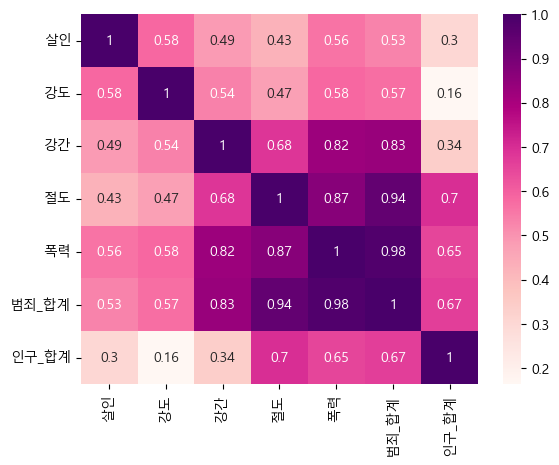

In [21]:
sns.heatmap(crime_people_df.corr(), annot = True, cmap = 'RdPu')

In [22]:
# 범죄_합계와 인구 수가 통계적으로 유의미한지 확인

# 두 변수 간의 피어슨 상관계수와 p_value 계산
correlation, p_value = pearsonr(crime_people_df['범죄_합계'], crime_people_df['인구_합계'])

print(f"상관계수 (범죄, 인구): {correlation}")
print(f"P_value (범죄, 인구): {p_value}")

상관계수 (범죄, 인구): 0.6668118399585028
P_value (범죄, 인구): 0.0002724864204548336


피어슨 상관계수의 p_value는 두 변수 간의 선형 관계가 통계적으로 유의미한지 여부를 평가

보통 0.05(5%) 이하의 p_value는 통계적으로 유의미한 관계라 할 수 있다

    - p_value ≤ 0.05: 변수 간의 상관계수는 통계적으로 유의미한 선형 관계가 있다.
    
    - p_value > 0.05: 변수 간의 상관계수는 통계적으로 유의미한 선형 관계가 없다.

=> 범죄 발생 현황과 인구 수의 상관이 통계적으로 유의하다

=> 출력 결과의 p_value를 계산하면 0.0002로 0.05 미만인 것을 알 수 있다

=> 인구수와 범죄수는 어느정도 관계는 있다

## 서울시 CCTV 데이터 분석

In [23]:
cctv_df = pd.read_csv('./범죄_data/서울시 안심이 CCTV 연계 현황.csv', encoding = 'cp949')

cctv_df = cctv_df.drop(['CCTV 수량', '수정 일시'], axis = 1) # CCTV 수량 col 제거

cctv_df

,자치구,안심 주소,위도,경도
0,중랑구,중화2동 326-86 (주택가 골목삼거리)_C-JH02-0032,37.5977,127.0728
1,중랑구,면목2동 146-1(고정3)_C-MM02-0013-C,37.5879,127.0812
2,중랑구,중화2동 326-88 (골목길 통신주)_C-JH02-0032-1,37.5976,127.0727
3,중랑구,면목2동 146-1(고정2)_C-MM02-0013-B,37.5879,127.0812
4,중랑구,중화2동 327-27 (고정)_C-JH02-0044-A,37.5986,127.0747
...,...,...,...,...
83729,강남구,대치2-256-02,37.5059,127.0589
83730,강남구,수서-208-01,37.4902,127.1014
83731,강남구,수서-208-02,37.4902,127.1014
83732,강남구,대치2-256-03,37.5059,127.0589


### 자치구 별 cctv 수량

In [24]:
cctv_gb = cctv_df.groupby(['자치구']).size().reset_index(name = 'cctv_수') # 자치구별 cctv 수량 구하기
cctv_gb.set_index('자치구', inplace = True)

cctv_gb

,cctv_수
자치구,
강남구,7007
강동구,3191
강북구,2858
강서구,3210
관악구,5366
광진구,4091
구로구,4050
금천구,2725
노원구,2655


<Axes: xlabel='자치구'>

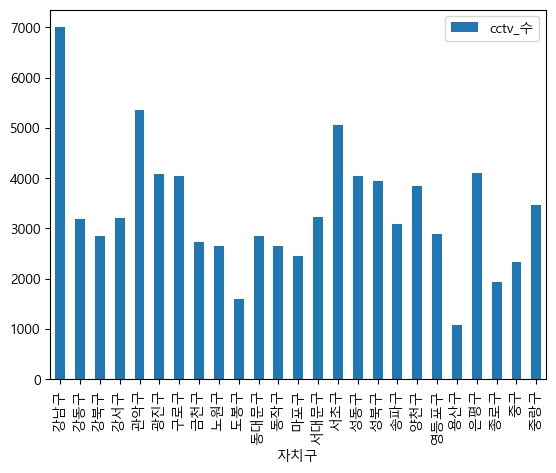

In [25]:
cctv_gb.plot(kind = 'bar')

=> cctv는 강남구에 가장 많다

### cctv와 5대 범죄의 관계 파악

In [26]:
seoul_crime_df.head(1)

,살인,강도,강간,절도,폭력,범죄_합계
자치구,,,,,,
종로구,2,8,228,1313,1587,3138


In [27]:
# 서울시 5대 범죄 현황과 서울시 cctv 수 데이터 합치기

crime_cctv_df = pd.merge(seoul_crime_df, cctv_gb, on = '자치구')

crime_cctv_df

,살인,강도,강간,절도,폭력,범죄_합계,cctv_수
자치구,,,,,,,
종로구,2,8,228,1313,1587,3138,1930
중구,1,5,194,1365,1506,3071,2336
용산구,5,7,280,978,1697,2967,1078
성동구,2,2,125,979,1086,2194,4036
광진구,6,0,230,1670,1713,3619,4091
동대문구,4,2,125,1556,1566,3253,2857
중랑구,2,2,150,1508,1937,3599,3471
성북구,3,1,158,1143,1444,2749,3943
강북구,5,5,177,872,1773,2832,2858


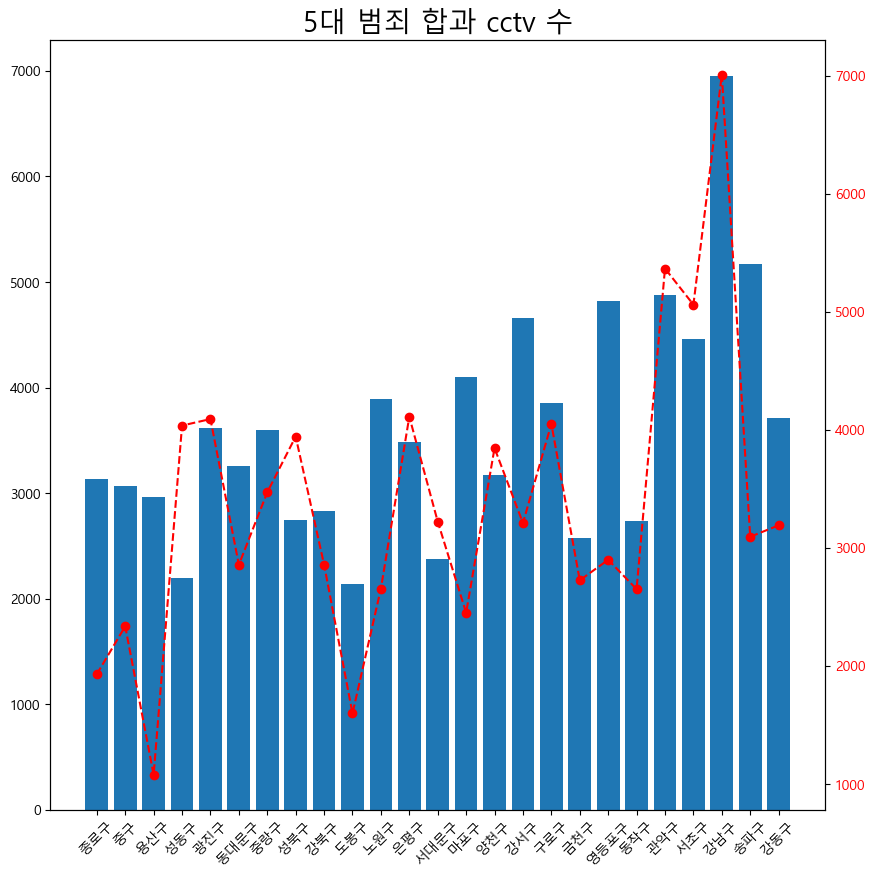

In [28]:
# 서울시 5대 범죄 현황과 서울시 cctv수 그래프 그리기
# 두 개의 서로 다른 축을 가지는 복수의 데이터를 동시에 시각화

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot()


xtick_label_position = list(range(len(crime_cctv_df))); # x축의 눈금 위치를 담음
ax1.set_xticks(xtick_label_position); # x축의 눈금 위치 설정
ax1.set_xticklabels(crime_cctv_df.index); # x축의 눈금 레이블을 지역 자치구로 설정
ax1.bar(xtick_label_position, crime_cctv_df['범죄_합계']); # 왼쪽 y축은 '범죄_합계'를 나타낸다
plt.xticks(rotation=45);
ax1.set_ylabel('범죄_합계');


ax2 = ax1.twinx() # ax1과 동일한 x축을 사용하면서 y축은 서로 다른 데이터를 표시하기 위해 새로운 y축을 만들기
ax2.plot(xtick_label_position, crime_cctv_df['cctv_수'], color='r', linestyle='--', marker = 'o'); # x축은 자치구, y축은 'cctv_수'를 나타낸다
ax2.tick_params(axis = 'y', labelcolor = 'r') # 오른쪽 y축의 눈금 레이블 색상 지정
ax2.set_ylabel('CCTV_수');

plt.title('5대 범죄 합과 cctv 수', fontsize=20);


<Axes: >

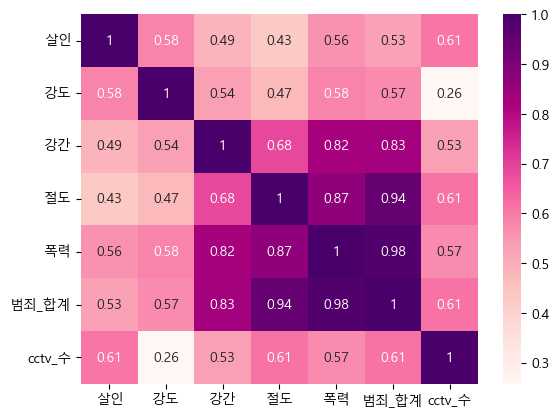

In [29]:
sns.heatmap(crime_cctv_df.corr(), annot = True, cmap = 'RdPu')

In [30]:
# 범죄_합계와 CCTV_수가 통계적으로 유의미한지 확인

# 두 변수 간의 피어슨 상관계수와 p_value 계산
correlation, p_value = pearsonr(crime_cctv_df['범죄_합계'], crime_cctv_df['cctv_수'])

print(f"상관계수 (범죄, CCTV): {correlation}")
print(f"P_value (범죄, CCTV): {p_value}")

상관계수 (범죄, CCTV): 0.610476675582361
P_value (범죄, CCTV): 0.0011915557522703412


=> 범죄 발생 현황과 CCTV 수의 상관이 통계적으로 유의하다

=> 출력 결과의 p_value를 계산하면 0.001로 0.05 미만인 것을 알 수 있다

=> 어느정도 범죄수와 cctv는 상관이 있다고 볼 수 있다

# 강남에서 많이 일어나는 이유가 유흥업소?

In [40]:
entertainment_df = pd.read_csv('./범죄_data/서울시 유흥주점영업 인허가 정보.csv', encoding = 'cp949')

entertainment_df = entertainment_df[~entertainment_df['상세영업상태명'].str.contains('폐업')] # 폐업이 아닌 유흥업소만 가져오기
entertainment_df = entertainment_df[['지번주소', '도로명주소']] # 필요한 col만 가져오기

entertainment_df

,지번주소,도로명주소
0,"서울특별시 강남구 역삼동 678-24 늘봄빌딩 2,3층","서울특별시 강남구 테헤란로27길 8-4, 늘봄빌딩 (2,3층) (역삼동)"
1,서울특별시 송파구 가락동 98-7,"서울특별시 송파구 송파대로28길 13, 지하1층 101호 (가락동, 거북이빌딩)"
3,서울특별시 영등포구 신길동 449-22 신성빌딩,"서울특별시 영등포구 영등포로 400, 신성빌딩 지하1층 (신길동)"
4,서울특별시 서초구 잠원동 12-21,서울특별시 서초구 강남대로 615 (잠원동)
6,서울특별시 동대문구 장안동 382-23,서울특별시 동대문구 장한로21길 11-4 (장안동)
...,...,...
4917,서울특별시 금천구 독산동 293-5,"서울특별시 금천구 범안로 1209, 지상3층 (독산동)"
4918,서울특별시 영등포구 영등포동3가 17-9 스카이모텔,"서울특별시 영등포구 영중로8길 13, 스카이모텔 지하1층 (영등포동3가)"
4919,"서울특별시 서초구 잠원동 21-3 ,4호 (지하 1층)",서울특별시 서초구 강남대로 597 (잠원동)
4920,"서울특별시 영등포구 여의도동 44-32 에리트빌팅 지하101,102,103호","서울특별시 영등포구 여의대방로65길 12 (여의도동, 에리트빌딩 지하101,102,..."


In [45]:
entertainment_df[['지번주소']]

,지번주소
0,"서울특별시 강남구 역삼동 678-24 늘봄빌딩 2,3층"
1,서울특별시 송파구 가락동 98-7
3,서울특별시 영등포구 신길동 449-22 신성빌딩
4,서울특별시 서초구 잠원동 12-21
6,서울특별시 동대문구 장안동 382-23
...,...
4917,서울특별시 금천구 독산동 293-5
4918,서울특별시 영등포구 영등포동3가 17-9 스카이모텔
4919,"서울특별시 서초구 잠원동 21-3 ,4호 (지하 1층)"
4920,"서울특별시 영등포구 여의도동 44-32 에리트빌팅 지하101,102,103호"


In [47]:
# 주소 중 구만 가져오기

entertainment_df['자치구'] = entertainment_df['지번주소'].str.split(' ').str[1]
entertainment_df

,지번주소,도로명주소,자치구
0,"서울특별시 강남구 역삼동 678-24 늘봄빌딩 2,3층","서울특별시 강남구 테헤란로27길 8-4, 늘봄빌딩 (2,3층) (역삼동)",강남구
1,서울특별시 송파구 가락동 98-7,"서울특별시 송파구 송파대로28길 13, 지하1층 101호 (가락동, 거북이빌딩)",송파구
3,서울특별시 영등포구 신길동 449-22 신성빌딩,"서울특별시 영등포구 영등포로 400, 신성빌딩 지하1층 (신길동)",영등포구
4,서울특별시 서초구 잠원동 12-21,서울특별시 서초구 강남대로 615 (잠원동),서초구
6,서울특별시 동대문구 장안동 382-23,서울특별시 동대문구 장한로21길 11-4 (장안동),동대문구
...,...,...,...
4917,서울특별시 금천구 독산동 293-5,"서울특별시 금천구 범안로 1209, 지상3층 (독산동)",금천구
4918,서울특별시 영등포구 영등포동3가 17-9 스카이모텔,"서울특별시 영등포구 영중로8길 13, 스카이모텔 지하1층 (영등포동3가)",영등포구
4919,"서울특별시 서초구 잠원동 21-3 ,4호 (지하 1층)",서울특별시 서초구 강남대로 597 (잠원동),서초구
4920,"서울특별시 영등포구 여의도동 44-32 에리트빌팅 지하101,102,103호","서울특별시 영등포구 여의대방로65길 12 (여의도동, 에리트빌딩 지하101,102,...",영등포구


In [ ]:
people_gb = people_df.groupby('동별(1)')['합계'].sum().reset_index() # 각 동별로 인구 합계 구하

In [68]:
# 자치구로 유흥업소 수량 구하기

entertainment_gb = entertainment_df.groupby('자치구').size().reset_index(name = '유흥업소_수')
entertainment_gb

,자치구,유흥업소_수
0,강남구,167
1,강동구,103
2,강북구,66
3,강서구,128
4,관악구,191
5,광진구,12
6,구로구,32
7,금천구,43
8,노원구,21
9,도봉구,19


<Axes: xlabel='자치구'>

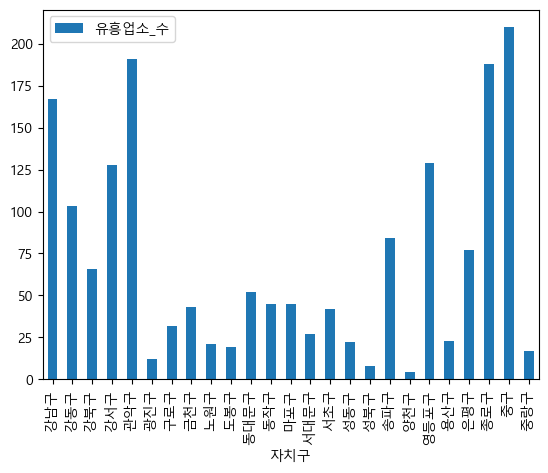

In [69]:
entertainment_gb.plot(kind = 'bar', x = '자치구')

=> 중구, 관악구, 종로구, 강남구 순으로 많다

## 유흥업소와 범죄의 관계 파악

In [70]:
crime_entertainment_df = pd.merge(seoul_crime_df, entertainment_gb, on = '자치구')

crime_entertainment_df

,자치구,살인,강도,강간,절도,폭력,범죄_합계,유흥업소_수
0,종로구,2,8,228,1313,1587,3138,188
1,중구,1,5,194,1365,1506,3071,210
2,용산구,5,7,280,978,1697,2967,23
3,성동구,2,2,125,979,1086,2194,22
4,광진구,6,0,230,1670,1713,3619,12
5,동대문구,4,2,125,1556,1566,3253,52
6,중랑구,2,2,150,1508,1937,3599,17
7,성북구,3,1,158,1143,1444,2749,8
8,강북구,5,5,177,872,1773,2832,66
9,도봉구,3,0,70,969,1099,2141,19


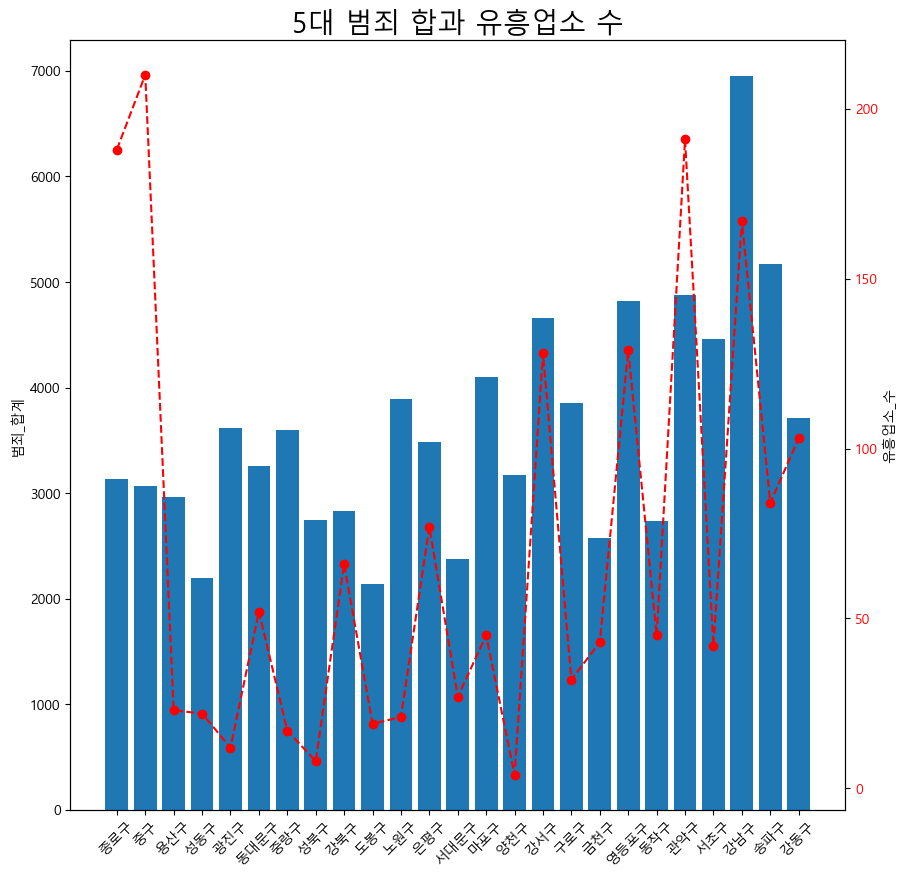

In [73]:
# 서울시 5대 범죄 현황과 서울시 유흥업소 수 그래프 그리기
# 두 개의 서로 다른 축을 가지는 복수의 데이터를 동시에 시각화

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot()


xtick_label_position = list(range(len(crime_entertainment_df))); # x축의 눈금 위치를 담음
ax1.set_xticks(xtick_label_position); # x축의 눈금 위치 설정
ax1.set_xticklabels(crime_entertainment_df['자치구']); # x축의 눈금 레이블을 지역 자치구로 설정
ax1.bar(xtick_label_position, crime_entertainment_df['범죄_합계']); # 왼쪽 y축은 '범죄_합계'를 나타낸다
plt.xticks(rotation=45);
ax1.set_ylabel('범죄_합계');


ax2 = ax1.twinx() # ax1과 동일한 x축을 사용하면서 y축은 서로 다른 데이터를 표시하기 위해 새로운 y축을 만들기
ax2.plot(xtick_label_position, crime_entertainment_df['유흥업소_수'], color='r', linestyle='--', marker = 'o'); # x축은 자치구, y축은 '유흥업소_수'를 나타낸다
ax2.tick_params(axis = 'y', labelcolor = 'r') # 오른쪽 y축의 눈금 레이블 색상 지정
ax2.set_ylabel('유흥업소_수');

plt.title('5대 범죄 합과 유흥업소 수', fontsize=20);


In [75]:
crime_entertainment_df.set_index('자치구', inplace = True)

crime_entertainment_df

,살인,강도,강간,절도,폭력,범죄_합계,유흥업소_수
자치구,,,,,,,
종로구,2,8,228,1313,1587,3138,188
중구,1,5,194,1365,1506,3071,210
용산구,5,7,280,978,1697,2967,23
성동구,2,2,125,979,1086,2194,22
광진구,6,0,230,1670,1713,3619,12
동대문구,4,2,125,1556,1566,3253,52
중랑구,2,2,150,1508,1937,3599,17
성북구,3,1,158,1143,1444,2749,8
강북구,5,5,177,872,1773,2832,66


<Axes: >

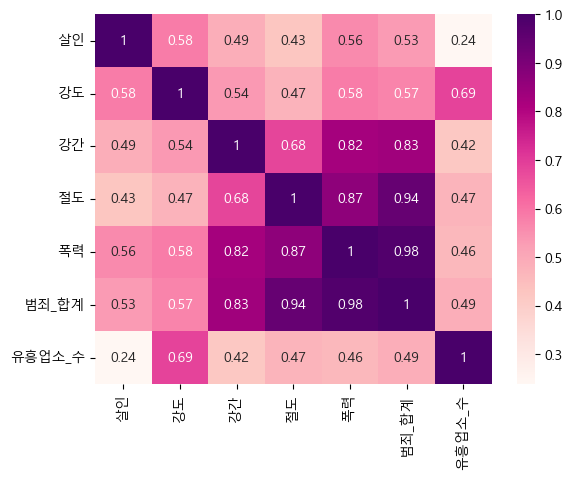

In [76]:
sns.heatmap(crime_entertainment_df.corr(), annot = True, cmap = 'RdPu')

In [77]:
# 범죄_합계와 CCTV_수가 통계적으로 유의미한지 확인

# 두 변수 간의 피어슨 상관계수와 p_value 계산
correlation, p_value = pearsonr(crime_entertainment_df['범죄_합계'], crime_entertainment_df['유흥업소_수'])

print(f"상관계수 (범죄, 유흥업소_수): {correlation}")
print(f"P_value (범죄, 유흥업소_수): {p_value}")

상관계수 (범죄, 유흥업소_수): 0.48640854749358275
P_value (범죄, 유흥업소_수): 0.01368194296375564


=> 범죄 발생 현황과 유흥업소_수의 상관이 통계적으로 많이 유의미하진 않다

=> 출력 결과의 p_value를 계산하면 0.013로 0.05 미만인 것을 알 수 있다

=> 어느정도 범죄수와 cctv는 아주 약간 상관(없을 수 있다)이 있다고 볼 수 있다

# 결론

- 5대 범죄 중 절도가 가장 많이 발생했으며 그 다음으로는 폭행이 많이 발생하였다

- 전국에서 5대 범죄가 가장 많이 일어나는 곳은 경기도이며 그 다음으로는 서울에서 많이 발생하였다

    => 그 중 데이터가 많은 서울시를 분석하였다
    
<서울시>
    
- 서울시 중 강남구에서 5대 범죄 발생 건수가 월등하게 높다

- 그 다음으로는 송파구, 관악구, 영등포구에서 많이 발생하였다.

- 서울시 인구 수 데이터를 사용해 분석 한 결과 송파구, 강서구, 강남구 순으로 인구 수가 많다

- 서울시 5대 범죄 발생 현황과 서울시 인구 수 데이터를 분석 한 결과 
    '상관계수가 0.67, p_value가 0.0002로 5대 범죄와 인구 수는 상관이 있다'라 생각하였다

- 서울시 CCTV 데이터를 사용해 분석 한 결과 강남구, 송파구 순으로 CCTV가 많이 설치되어있다.

- 서울시 5대 범죄 발생 현황과 서울시 CCTV 수 데이터를 분석한 결과 
    '상관계수가 0.61, p_value가 0.001로 5대 범죄와 CCTV 수는 상관이 있다'라 생각하였다
    
- 서울시 5대 범죄 발생 현황과 서울시 유흥업소_수 데이터를 분석한 결과 
    '상관계수가 0.48, p_value가 0.013로 5대 범죄와 유흥업소_수는 상관이 없다'라 생각하였다  